# Tutorial 2

Today we analyze an excel file

In [1]:
import pandas as pd


In [2]:
df = pd.read_excel('/Users/yoanl/OneDrive/Documents/UTC/Info/US01/Data-sheet-STUDENTS(1).xlsx',
                #Select the line's number where the selection begins
              header=2,
                #Select the column letter
              usecols='B',                                    
                #Name the column
                  names=['countries']                         
                  )                                            

df


,countries
0,Afghanistan
1,Albania
2,Armenia
3,Azerbaijan
4,Bahrain
5,Bangladesh
6,Belarus
7,Bhutan
8,Bosnia and Herzegovina
9,Brunei


In [3]:
#Create a dictionnary
countries = {}                       

#Create a key for each country
for country in df['countries']:      
    countries[country] = {}
    
#Print the dictionnary with all the countries  
countries

{'Afghanistan': {},
 'Albania': {},
 'Armenia': {},
 'Azerbaijan': {},
 'Bahrain': {},
 'Bangladesh': {},
 'Belarus': {},
 'Bhutan': {},
 'Bosnia and Herzegovina': {},
 'Brunei': {},
 'Bulgaria': {},
 'Cambodia': {},
 'China': {},
 'Croatia': {},
 'Czech Republic': {},
 'East Timor': {},
 'Egypt': {},
 'Estonia': {},
 'France (Not BRI)': {},
 'Georgia': {},
 'Germany (not BRI)': {},
 'Hungary': {},
 'India': {},
 'Indonesia': {},
 'Iran': {},
 'Iraq': {},
 'Israel': {},
 'Jordan': {},
 'Kazakhstan': {},
 'Kuwait': {},
 'Kyrgyzstan': {},
 'Laos': {},
 'Latvia': {},
 'Lebanon': {},
 'Lithuania': {},
 'Macedonia': {},
 'Malaysia': {},
 'Maldives': {},
 'Moldova': {},
 'Mongolia': {},
 'Montenegro': {},
 'Myanmar': {},
 'Nepal': {},
 'Oman': {},
 'Pakistan': {},
 'Philippines': {},
 'Poland': {},
 'Qatar': {},
 'Romania': {},
 'Russia': {},
 'Saudi Arabia': {},
 'Serbia': {},
 'Singapore': {},
 'Slovakia': {},
 'Slovenia': {},
 'Sri Lanka': {},
 'Syria': {},
 'Tajikistan': {},
 'Thailiand'

In [4]:
#ask  thing and give answer on internet
import requests   

#module qui permet de mettre en pause le programme
from time import sleep     

#Add sub-dictionnary with ISO code

for country in countries.keys():
    try: 
        #country = list(countries.keys())[i]
        url = ' https://restcountries.eu/rest/v2/name/'+country
        r = requests.get(url)
        data = r.json();
        countries[country]['alpha2Code'] = data[0]['alpha2Code']
    except KeyError: 
        print(data, country)
        sleep(5)

#We see that there are 6 mistakes

{'status': 404, 'message': 'Not Found'} France (Not BRI)
{'status': 404, 'message': 'Not Found'} Germany (not BRI)
{'status': 404, 'message': 'Not Found'} Thailiand
{'status': 404, 'message': 'Not Found'} The United Arab Emirates
{'status': 404, 'message': 'Not Found'} United Kingdom (Not BRI)
{'status': 404, 'message': 'Not Found'} United States of America (Not BRI)


In [5]:
#We will correct the errors

#We select as k,v each couple of the dictionnary
for k,v in countries.items():
    country = ''
    if len(v.keys()) == 0:
        #France-Germany-USA-UK
        if 'not bri' in k.lower(): 
            country = k.split('(')[0].strip()
        #Thailand
        elif k == 'Thailiand':
            country = 'thailand'
        #UAE
        else:
            country = k[4:]
        #We add the 6 ISO code
        try:
            url = 'https://restcountries.eu/rest/v2/name/'+country
            r = requests.get(url)
            data = r.json()
            countries[k]['alpha2Code'] = data[0]['alpha2Code']
        except KeyError:
            print(data)
            sleep(5)
                    


In [7]:
#We correct India's ISO code
countries['India']['alpha2Code'] = 'IN'

## GDP of each country

In [11]:
#We had the gdp for every country except Yemen and Syria because they have not one
for k,v in countries.items():
    try :
        url = 'http://api.worldbank.org/v2/countries/'+ v['alpha2Code'] + '/indicators/NY.GDP.MKTP.CD?format=json'
        r = requests.get(url)
        data = r.json()
        countries[k]['gdp'] = float(data[1][0]['value'])
        sleep(2)
    except IndexError:
        print(k,'has an idex problem',data)
    except TypeError:
        print(k,'has a type problem',data)
        
countries                          

Syria has a type problem [{'page': 1, 'pages': 2, 'per_page': 50, 'lastupdated': '2018-10-18', 'total': 58}, [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'SY', 'value': 'Syrian Arab Republic'}, 'countryiso3code': 'SYR', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'SY', 'value': 'Syrian Arab Republic'}, 'countryiso3code': 'SYR', 'date': '2016', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'SY', 'value': 'Syrian Arab Republic'}, 'countryiso3code': 'SYR', 'date': '2015', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'SY', 'value': 'Syrian Arab Republic'}, 'countryiso3code': 'SYR', 'date': '2014', 'value': None, 'unit': '', 'ob

Yemen has a type problem [{'page': 1, 'pages': 2, 'per_page': 50, 'lastupdated': '2018-10-18', 'total': 58}, [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'YE', 'value': 'Yemen, Rep.'}, 'countryiso3code': 'YEM', 'date': '2017', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'YE', 'value': 'Yemen, Rep.'}, 'countryiso3code': 'YEM', 'date': '2016', 'value': 18213328571.4286, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'YE', 'value': 'Yemen, Rep.'}, 'countryiso3code': 'YEM', 'date': '2015', 'value': 34602480338.778, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'YE', 'value': 'Yemen, Rep.'}, 'countryiso3code': 'YEM', 'date': '2014', 'value': 43228582065.2427, 'unit': '', 'obs

{'Afghanistan': {'alpha2Code': 'AF', 'gdp': 20815300220.0428},
 'Albania': {'alpha2Code': 'AL', 'gdp': 13039352743.9616},
 'Armenia': {'alpha2Code': 'AM', 'gdp': 11536590635.8268},
 'Azerbaijan': {'alpha2Code': 'AZ', 'gdp': 40747792237.9735},
 'Bahrain': {'alpha2Code': 'BH', 'gdp': 35307127659.5745},
 'Bangladesh': {'alpha2Code': 'BD', 'gdp': 249723887765.42},
 'Belarus': {'alpha2Code': 'BY', 'gdp': 54442374372.5094},
 'Bhutan': {'alpha2Code': 'BT', 'gdp': 2511852941.17647},
 'Bosnia and Herzegovina': {'alpha2Code': 'BA', 'gdp': 18168579578.1952},
 'Brunei': {'alpha2Code': 'BN', 'gdp': 12128089001.5858},
 'Bulgaria': {'alpha2Code': 'BG', 'gdp': 56831518294.4397},
 'Cambodia': {'alpha2Code': 'KH', 'gdp': 22158209502.6391},
 'China': {'alpha2Code': 'CN', 'gdp': 12237700479375.0},
 'Croatia': {'alpha2Code': 'HR', 'gdp': 54849180228.8716},
 'Czech Republic': {'alpha2Code': 'CZ', 'gdp': 215725534372.371},
 'East Timor': {'alpha2Code': 'TL', 'gdp': 2954620999.58441},
 'Egypt': {'alpha2Code':

In [12]:
#We add 'None' as Yemen's and Syria's gdp to avoid error
countries ['Syria']['gdp'] = None 
countries ['Yemen']['gdp'] = None

In [16]:
#Add the list of gdp in the dataframe
s=pd.Series([v['gdp']for k,v in countries.items()])
df['gdp'] = s
df

,countries,gdp
0,Afghanistan,2.081530e+10
1,Albania,1.303935e+10
2,Armenia,1.153659e+10
3,Azerbaijan,4.074779e+10
4,Bahrain,3.530713e+10
5,Bangladesh,2.497239e+11
6,Belarus,5.444237e+10
7,Bhutan,2.511853e+09
8,Bosnia and Herzegovina,1.816858e+10
9,Brunei,1.212809e+10


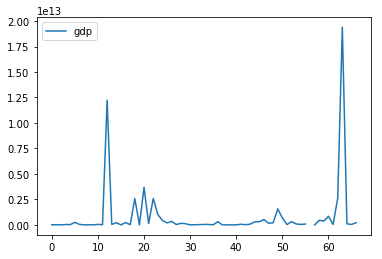

In [18]:
#Plot the graph of gdp depending on the country's number in the list
%matplotlib inline
import matplotlib.pyplot as plt
df.plot()


In [19]:
#Add to the excel sheet
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()